<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [2]:
# Import torch
import torch
from functions import get_device

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = get_device()
device = 'cpu' # USE CPU bc run out of memory on MPS!!
print(device)

2.1.1
cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

Video recognition for self-driving cars, video recognition of people/objects for street cameras, and image recognition for retail.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

When the model fits too well to the training data and does not generalize well to the testing data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Regularization: Penalty term to the function to prevent overfitting. (e.g. L1 or L2 regularization)
2. Simpler model (fewer parameters to prevent overfitting)
3. *Cross validation: training dataset split into smaller datasets and train model and evaluate on each dataset. 
4. *Early stopping: stop training when model's performance on test set starts to degrade
5. *Ensemble methods: train multiple models and combine predictions to make a final prediction.

*ones I like

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(root='data',
                                   train=True,
                                   download=False, #already downloaded
                                   transform=ToTensor(),
                                   target_transform=None,
                                   )
test_data = datasets.FashionMNIST(root='data',
                                    train=False,
                                    download=False, #already downloaded
                                    transform=ToTensor(),
                                    target_transform=None,
                                    )

## 6. Visualize at least 5 different samples of the MNIST training dataset.

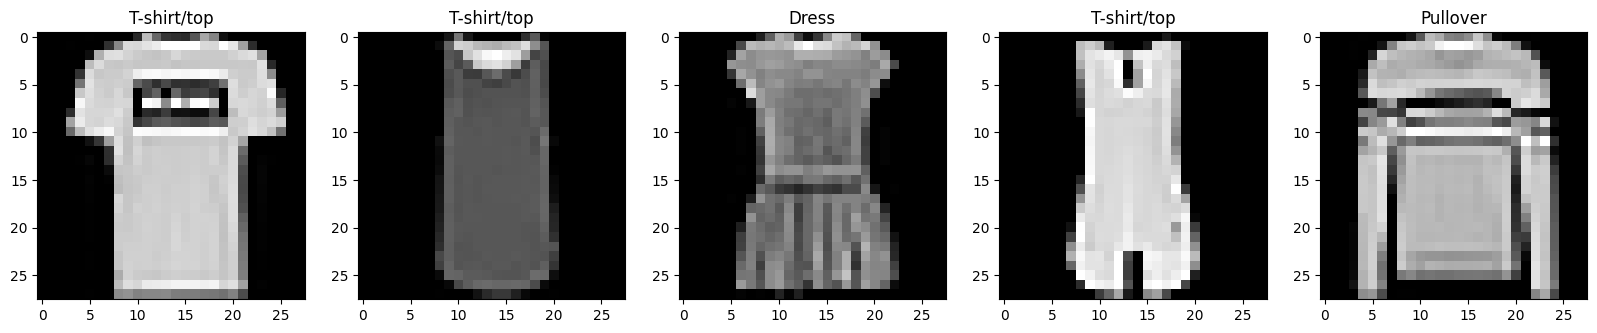

In [4]:
import matplotlib.pyplot as plt
labels = train_data.classes

plt.figure(figsize = (20,5))

rows, cols = 1, 5

for i in range(1, rows*cols + 1):
    plt.subplot(rows, cols, i)
    plt.imshow(train_data.data[i].squeeze(), cmap='gray')
    plt.title(f'{labels[train_data.targets[i]]}')


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split

BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
import torch.nn as nn
class FashionMNISTModel(torch.nn.Module):
    def __init__(self, input_shape, output_shape, hidden_layers):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      ),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      stride=1,
                      padding=1,
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*7*7, # hidden_layers * _ * _
                      out_features=output_shape)
        )
    
    def forward(self, x:torch.Tensor):
        x = self.block1(x)
        #print(f"output shape after block 1: {x.shape}")
        x = self.block2(x)
        #print(f"output shape after block 2: {x.shape}")
        x = self.flatten(x)
        #print(f"output shape after flatten: {x.shape}")
        #print(f"classifier rows: {10*7*7}")
        x = self.classifier(x)
        #print(f"output shape after classifier: {x.shape}")
        return x        

model0 = FashionMNISTModel(input_shape=1, # check the Color/Channel size in the torch tensor (e.g. order is [N, C, H, W] where channel/color is C)
                                   output_shape=10,
                                   hidden_layers=10).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
for batch, (X,y) in enumerate(test_loader):
    print(X.shape)
    break

torch.Size([32, 1, 28, 28])


In [8]:
# Create functions for Test and Train loops
def train_step(model:torch.nn.Module,
              data: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              optimizer: torch.optim.Optimizer,
              device = device
              ):
    model.train()
    train_loss = 0
    train_acc = 0
    for batch, (X,y) in enumerate(data):
        X, y = X.to(device), y.to(device)
        y_logits = model(X)
        y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(y_preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss /= len(data)
    train_acc /= len(data)
    return train_loss, train_acc

def test_step(model:torch.nn.Module,
              data: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device = device
              ):
    model.eval()
    test_loss = 0
    test_acc = 0
    for batch, (X,y) in enumerate(data):
        X, y = X.to(device), y.to(device)
        y_logits = model(X)
        y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

        test_loss += loss_fn(y_logits, y)
        test_acc += accuracy_fn(y_preds, y)
    
    test_loss /= len(data)
    test_acc /= len(data)
    return test_loss, test_acc

In [11]:
from functions import accuracy_fn, print_train_time
from timeit import default_timer as timer
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=.01)

start_time_on_cpu = timer()
# epochs
epochs=5
# train loop
for epoch in tqdm(range(epochs)):
    # train
    loss, acc = train_step(model0, 
                           test_loader,
                           loss_fn,
                           accuracy_fn,
                           optimizer)
    # train
    test_loss, test_acc = test_step(model0, 
                           train_loader,
                           loss_fn,
                           accuracy_fn)
    
    print(f"train loss: {loss:.3f} | test loss: {test_loss:.3f} | train accuracy {acc:.2f}% | test accuracy {test_acc:.2f}%")
    
end_time_on_cpu = timer()
total_time_on_cpu = print_train_time(start_time_on_cpu, end_time_on_cpu, device='cpu')


 20%|██        | 1/5 [00:14<00:59, 14.80s/it]

train loss: 0.373 | test loss: 0.395 | train accuracy 86.26% | test accuracy 86.22%


 40%|████      | 2/5 [00:28<00:42, 14.13s/it]

train loss: 0.360 | test loss: 0.410 | train accuracy 86.58% | test accuracy 86.09%


 60%|██████    | 3/5 [00:42<00:28, 14.09s/it]

train loss: 0.350 | test loss: 0.430 | train accuracy 86.70% | test accuracy 85.76%


 80%|████████  | 4/5 [00:55<00:13, 13.47s/it]

train loss: 0.356 | test loss: 0.413 | train accuracy 86.86% | test accuracy 85.90%


100%|██████████| 5/5 [01:09<00:00, 13.93s/it]

train loss: 0.342 | test loss: 0.463 | train accuracy 87.35% | test accuracy 84.83%
Training time on cpu: 69.6862 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [12]:
# random samples
import random
random.seed(42)

samples = random.sample(list(test_data),9)
test_images = list()
test_labels = list()
for img, label in samples:
    test_images.append(img)
    test_labels.append(labels[label])

test_images[0].shape, test_images[0].shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

(-0.5, 27.5, 27.5, -0.5)

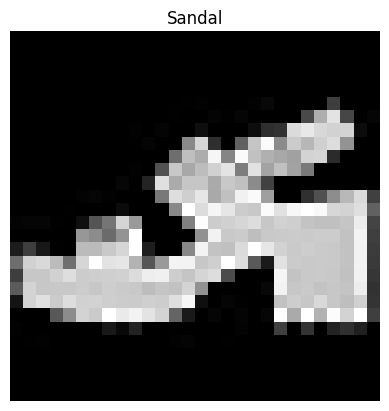

In [13]:
# plot a sampled image and label
import matplotlib.pyplot as plt
plt.imshow(test_images[0].squeeze(), cmap = 'gray')
plt.title(test_labels[0])
plt.axis("off")

In [14]:
# make predictions on samples
model0.eval()
y_preds = list()
pred_labels = list()
for i in range(9):
    X = test_images[i]
    y = test_labels[i]
    
    y_logit = model0(X.unsqueeze(dim=1))
    y_pred = torch.softmax(y_logit,1).argmax(dim=1)
    y_preds.append(y_pred)
    pred_labels.append(labels[y_pred])

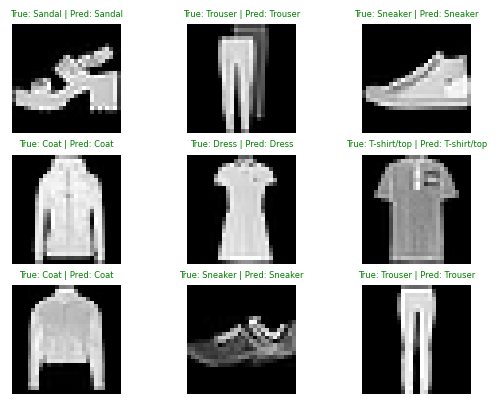

In [15]:
import math
# visualize 
plt.figure()
nrows = 3
ncols = 3
for i, img in enumerate(test_images):
    # plot figure
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img.squeeze(), cmap = 'gray')

    # title text (true: | pred: )
    true_label = test_labels[i]
    pred_label = pred_labels[i]
    title_text = f"True: {true_label} | Pred: {pred_label}"

    # color 
    if true_label == pred_label:
        plt.title(title_text, color = 'green', fontsize=6)
    if true_label != pred_label:
        plt.title(title_text, color = 'red', fontsize=6)
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [16]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model0.eval()
with torch.inference_mode():
    for X,y in tqdm(test_loader, desc="Making predictions..."):
        # Send the data and labels to target device
        X, y = X.to(device), y.to(device)
        # Do the forward pass
        y_logit = model0(X)
        # Turn preidctions from logits -> probs -> labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Append batch predictions to list
        y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
print(y_pred_tensor[:10])
len(y_pred_tensor)

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 409.26it/s]

tensor([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])


10000

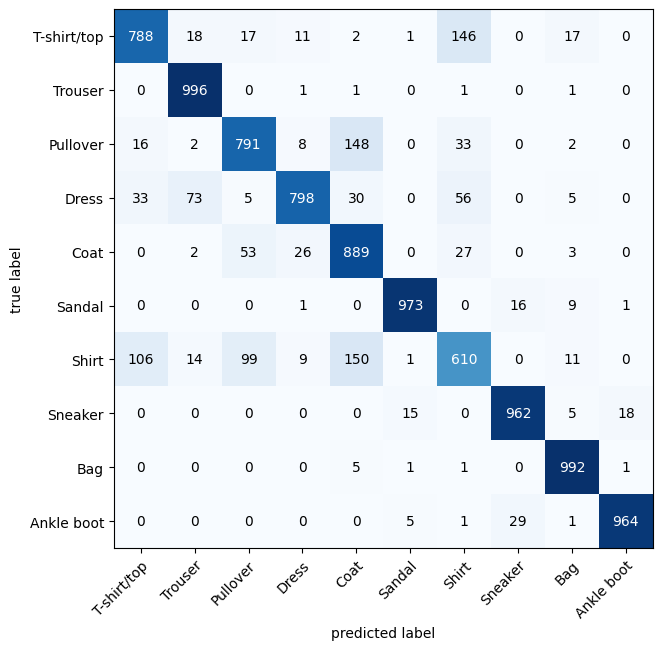

In [18]:
# import confusion matrix packages
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(labels), task = 'multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix 
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=labels,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [25]:
random_tensor = torch.rand([1,3,64,64])
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=5,
                       stride=1,
                       padding=1)
conv_output = conv_layer(random_tensor)
conv_output.shape

torch.Size([1, 10, 62, 62])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

(-0.5, 27.5, 27.5, -0.5)

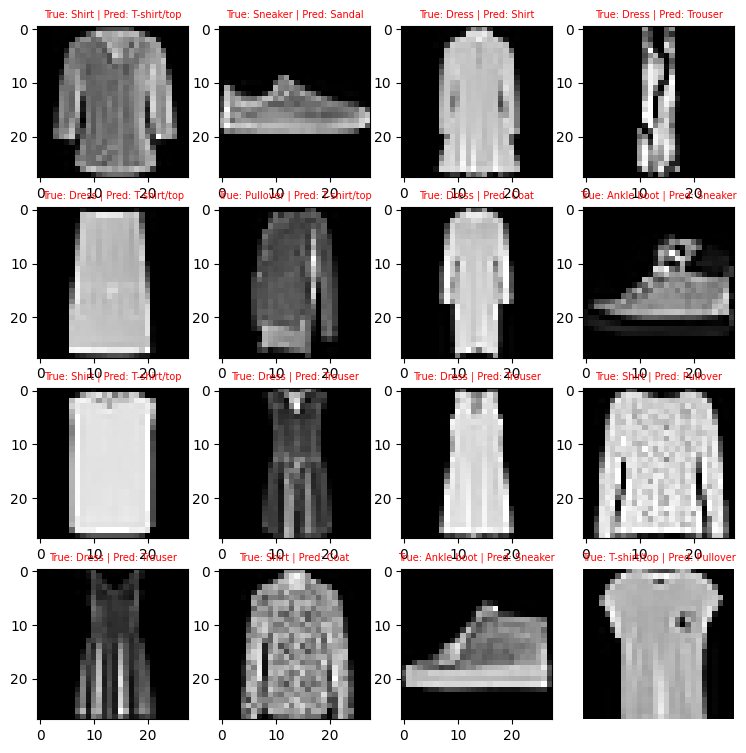

In [33]:
import math
# visualize 
plt.figure(figsize=(9,9))
nrows = 4
ncols = 4


i = 0
images_plotted = 0
while images_plotted < 16:
    # check if pred-truth mismatch
    mismatch = test_data.targets[i] != y_pred_tensor[i]

    # plot mismatch
    if mismatch == True:
        img = test_data.data[i]
        plt.subplot(nrows, ncols, images_plotted+1)
        plt.imshow(img, cmap = 'gray')

        true_label = labels[test_data.targets[i]]
        pred_label = labels[y_pred_tensor[i]]
        title_text = f"True: {true_label} | Pred: {pred_label}"
        plt.title(title_text, color = 'red', fontsize=7)
        
        images_plotted += 1

    i += 1
plt.axis('off')